In [23]:
import requests as rq
from bs4 import BeautifulSoup as bs
from IPython.display import Image, display
import streamlit as st


'''
Dudas generales: ¿Cómo bajo imágenes con BS4 uy como las muestro en Jupyter?
Qué es data-src? Yo puedo hacer atributos a las etiquetas?
Cannot embed the 'jpeg?itok=mtnzauzt' image format


'''

'\nDudas generales: ¿Cómo bajo imágenes con BS4 uy como las muestro en Jupyter?\nQué es data-src\n\n'

In [24]:
url ="https://www.pagina12.com.ar/315350-para-un-astronomo-de-harvard-el-asteroide-oumuamua-es-tecnol"

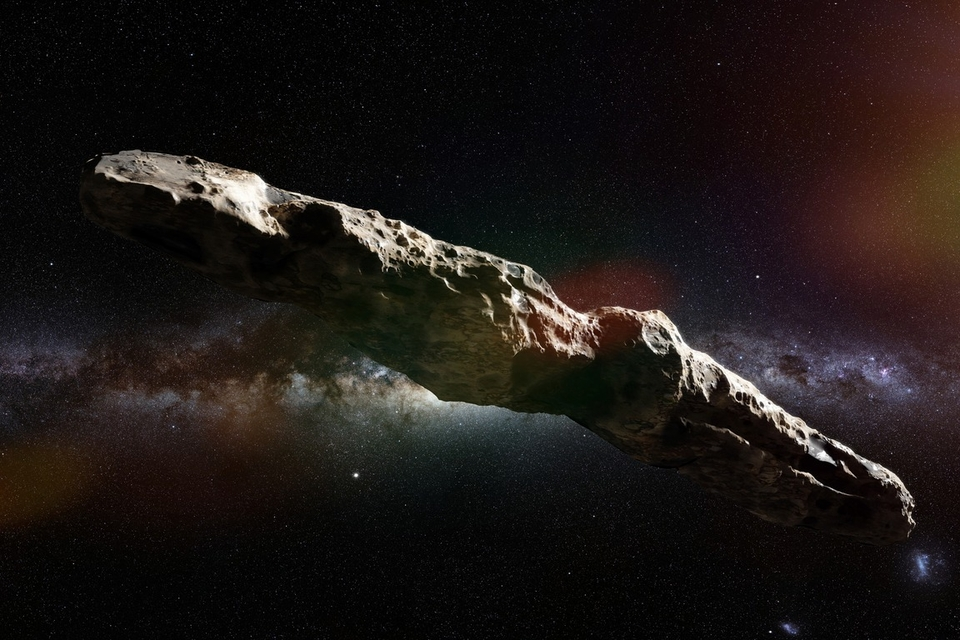

In [44]:

def getNews(url):
    '''
    Tiene como propósito scrapear las  el cuerpo de la noticia, la imagen y la fecha.
    '''
    try:
        response = rq.get(url)
    except Exception as e:
        print("Error scrapeando la URL", url)
        print(e)
        return None

    
    if response.status_code == 200:
        dic_news ={}
        soup = bs(response.text, 'lxml')
        dic_news['title'] = soup.h1.get_text()
        dic_news['body'] = soup.find('div', attrs = {'class','article-text'}).get_text()
        # Busco la imagen del contendor y el atributo src de la imagen.
        dic_news['img'] = soup.find('div', attrs={'class':'article-main-media-image'}).find_all('img')[1].get('data-src').replace('?itok=MTNZaUZt','')
    else:
        print('Hipervínculo no disponible')
    return dic_news

alien_news = getNews(url)
display(Image(rq.get(alien_news['img']).content))
